# Data Prep for Convolutional Neural Network for DRUJ

### Test Cases


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load data

Load subjects 202 through 231 

Start with the three images for the first case.

In [2]:
view1 = np.asarray(pd.read_csv('Subject202View1.csv', header = None))
view2 = np.asarray(pd.read_csv('Subject202View2.csv', header = None))
view3 = np.asarray(pd.read_csv('Subject202View3.csv', header = None))

In [3]:
print(view1.shape, view2.shape, view3.shape)

(1000, 700) (1000, 700) (1000, 700)


In [4]:
print(type(view1), type(view2), type(view3))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


Add cases 203 through 231

In [5]:
s1 = 'Subject'
s21 = 'View1.csv'
s22 = 'View2.csv'
s23 = 'View3.csv'
for i in range(29):
    # view 1
    filename1 = (s1+str(i+203)+s21)
    temp11 = pd.read_csv(filename1, header = None)
    temp12 = np.asarray(temp11)
    view1 = np.vstack((view1, temp12))
    #view 2
    filename2 = (s1+str(i+203)+s22)
    temp21 = pd.read_csv(filename2, header = None)
    temp22 = np.asarray(temp21)
    view2 = np.vstack((view2, temp22))
    # view 3
    # print(i)
    filename3 = (s1+str(i+203)+s23)
    temp31 = pd.read_csv(filename3, header = None)
    temp32 = np.asarray(temp31)
    view3 = np.vstack((view3, temp32))

Check the arrays

In [6]:
print(view1.shape, view2.shape, view3.shape)

(30000, 700) (30000, 700) (30000, 700)


### Make Combined View

In [7]:
comboViews = np.append(view1, view2, axis = 1)
comboViews = np.append(comboViews, view3, axis = 1)
comboViews.shape

(30000, 2100)

### Save Array

In [8]:
np.savetxt('ComboViewAugTest.csv', comboViews, delimiter=",")

### Reshape Array for analysis

In [9]:
comboViewsNew = np.reshape(comboViews,(30,1000,2100,1))

In [10]:
print(comboViewsNew.shape)

(30, 1000, 2100, 1)


<function matplotlib.pyplot.show(close=None, block=None)>

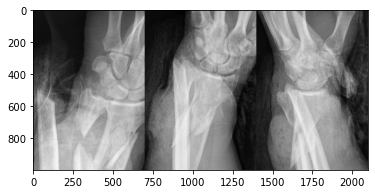

In [12]:
img = comboViewsNew[28,:,:]
plt.imshow(img, cmap='gray')
plt.show

### Reduce resolution of images by 1/4

In [13]:
ComboReduce = np.zeros((15000, 1050))
ComboReduce.shape

(15000, 1050)

In [14]:
print(type(comboViews[0,0]))

<class 'numpy.float64'>


In [15]:
for k in range(15000):
    for i in range(1050):
        ComboReduce[k,i] = (comboViews[2*k,2*i,]+comboViews[2*k+1,2*i]+
                                    comboViews[2*k, 2*i+1]+comboViews[2*k+1,2*i+1])/4           

In [16]:
ComboReduceNew = np.reshape(ComboReduce,(30,500,1050,1))

<function matplotlib.pyplot.show(close=None, block=None)>

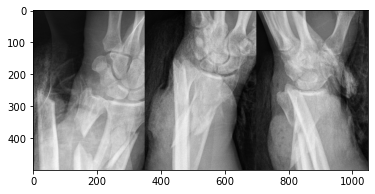

In [18]:
img1 = ComboReduceNew[28,:,:]
plt.imshow(img1, cmap='gray')
plt.show

## Save reduced array

In [19]:
np.savetxt('ComboReduceAugTest.csv', ComboReduce, delimiter=",")